In [1]:

!pip install mlxtend
!pip install scikit-learn-extra
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [2]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db')

In [3]:
cur = con.cursor()

In [4]:
accident_data = pd.read_sql(sql = "SELECT * FROM accident", con = con)

In [5]:
accident_data

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [6]:
vehicle_data =  pd.read_sql(sql = "SELECT * FROM vehicle", con = con)

In [7]:
vehicle_data

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,0,2017010001708,2017,010001708,1,9,0,18,1,5,...,6,1,24,5,1997,2,1,-1,-1,-1
1,1,2017010001708,2017,010001708,2,2,0,18,1,5,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2,2017010009342,2017,010009342,1,9,0,18,5,1,...,6,1,33,6,1797,8,8,-1,9,1
3,3,2017010009342,2017,010009342,2,9,0,18,5,1,...,6,1,40,7,2204,2,12,-1,2,1
4,4,2017010009344,2017,010009344,1,9,0,18,3,7,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849086,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
849087,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
849088,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
849089,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [8]:
casualty_data = pd.read_sql(sql = "SELECT * FROM casualty", con = con)

In [9]:
casualty_data

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,0,2017010001708,2017,010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,1,2017010001708,2017,010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2,2017010001708,2017,010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,3,2017010009342,2017,010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,4,2017010009344,2017,010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600327,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
600328,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
600329,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
600330,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [10]:
lsoa_data = pd.read_sql(sql = "SELECT * FROM lsoa", con = con)

In [11]:
lsoa_data

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [12]:
accident_info = cur.execute(f'PRAGMA table_info(accident)')

In [13]:
#accident_info.fetchall()

In [14]:
accident_list= [x[1] for x in list(accident_info.fetchall())]

In [15]:
accident_list

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [16]:
vehicle_info = cur.execute(f'PRAGMA table_info(vehicle)')

In [17]:
#vehicle_info.fetchall()

In [18]:
vehicle_list= [x[1] for x in list(vehicle_info.fetchall())]

In [19]:
vehicle_list

['vehicle_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type']

In [20]:
casualty_info = cur.execute(f'PRAGMA table_info(casualty)')

In [21]:
#casualty_info.fetchall()

In [22]:
casualty_list= [x[1] for x in list(casualty_info.fetchall())]

In [23]:
casualty_list

['casualty_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile']

In [24]:
lsoa_info = cur.execute(f'PRAGMA table_info(lsoa)')

In [25]:
#lsoa_info.fetchall()

In [26]:
#col_names = []
lsoa_list= [x[1] for x in list(lsoa_info.fetchall())]

In [27]:
lsoa_list

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

In [28]:
all_col_names = []

In [29]:
all_col_names.append(accident_list)

In [30]:
all_col_names.append(vehicle_list)

In [31]:
all_col_names.append(casualty_list)

In [32]:
all_col_names.append(lsoa_list)

In [33]:
all_col_names

[['accident_index',
  'accident_year',
  'accident_reference',
  'location_easting_osgr',
  'location_northing_osgr',
  'longitude',
  'latitude',
  'police_force',
  'accident_severity',
  'number_of_vehicles',
  'number_of_casualties',
  'date',
  'day_of_week',
  'time',
  'local_authority_district',
  'local_authority_ons_district',
  'local_authority_highway',
  'first_road_class',
  'first_road_number',
  'road_type',
  'speed_limit',
  'junction_detail',
  'junction_control',
  'second_road_class',
  'second_road_number',
  'pedestrian_crossing_human_control',
  'pedestrian_crossing_physical_facilities',
  'light_conditions',
  'weather_conditions',
  'road_surface_conditions',
  'special_conditions_at_site',
  'carriageway_hazards',
  'urban_or_rural_area',
  'did_police_officer_attend_scene_of_accident',
  'trunk_road_flag',
  'lsoa_of_accident_location'],
 ['vehicle_index',
  'accident_index',
  'accident_year',
  'accident_reference',
  'vehicle_reference',
  'vehicle_type',

In [34]:
accident_count = cur.execute('SELECT Count(*) FROM accident ')

In [35]:
accident_count.fetchall()

[(461352,)]

In [36]:
casualty_count = cur.execute('SELECT Count(*) FROM casualty ')

In [37]:
casualty_count.fetchall()

[(600332,)]

In [38]:
vehicle_count = cur.execute('SELECT Count(*) FROM vehicle ')

In [39]:
vehicle_count.fetchall()

[(849091,)]

In [40]:
lsoa_count = cur.execute('SELECT Count(*) FROM lsoa ')

In [41]:
lsoa_count.fetchall()

[(34378,)]

# Accidents from 2020

In [42]:
accident_data_2020 = pd.read_sql(sql = "SELECT * FROM accident where accident_year = 2020 ", con = con)

In [43]:
vehicle_data_2020 = pd.read_sql(sql = "SELECT * FROM vehicle where accident_year = 2020 ", con = con)

In [44]:
casualty_data_2020 = pd.read_sql(sql = "SELECT * FROM casualty where accident_year = 2020 ", con = con)

# Creating Pandas DataFrames

In [173]:
accident_df = pd.DataFrame(accident_data, columns = accident_list)

In [46]:
vehicle_df = pd.DataFrame(vehicle_data, columns = vehicle_list)

In [47]:
casualty_df = pd.DataFrame(casualty_data, columns = casualty_list)

# EDA

In [48]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [49]:
accident_df.isnull().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          116
location_northing_osgr                         116
longitude                                      126
latitude                                       126
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [50]:
accident_df['location_easting_osgr'].unique()

array([532920., 526790., 535200., ..., 286242., 343034., 257963.])

In [51]:
accident_df[accident_df['location_easting_osgr'].isnull()]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
28222,201704ED17168,2017,04ED17168,NaN,NaN,NaN,NaN,4,3,3,...,0,1,1,1,0,0,3,1,2,-1
28865,201704EF17292,2017,04EF17292,NaN,NaN,NaN,NaN,4,3,2,...,0,4,9,-1,0,0,3,1,2,-1
30154,201704SC17240,2017,04SC17240,NaN,NaN,NaN,NaN,4,3,2,...,4,1,2,2,0,0,2,1,2,E01024923
30411,201704WA17179,2017,04WA17179,NaN,NaN,NaN,NaN,4,3,2,...,0,4,2,2,0,0,2,1,2,E01025027
39550,2017077353971,2017,077353971,NaN,NaN,NaN,NaN,7,3,3,...,0,1,1,1,0,0,2,1,2,E01018680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456858,202063A035620,2020,63A035620,NaN,NaN,NaN,NaN,63,3,1,...,0,1,1,1,0,0,3,2,-1,-1
456938,202063A059120,2020,63A059120,NaN,NaN,NaN,NaN,63,3,2,...,0,1,1,1,0,0,3,2,-1,-1
457171,202063C020320,2020,63C020320,NaN,NaN,NaN,NaN,63,3,2,...,0,7,1,1,0,0,3,2,-1,-1
457183,202063C024520,2020,63C024520,NaN,NaN,NaN,NaN,63,2,2,...,0,1,1,1,0,0,3,2,-1,-1


In [52]:
accident_df[accident_df['location_northing_osgr'].isnull()]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
28222,201704ED17168,2017,04ED17168,NaN,NaN,NaN,NaN,4,3,3,...,0,1,1,1,0,0,3,1,2,-1
28865,201704EF17292,2017,04EF17292,NaN,NaN,NaN,NaN,4,3,2,...,0,4,9,-1,0,0,3,1,2,-1
30154,201704SC17240,2017,04SC17240,NaN,NaN,NaN,NaN,4,3,2,...,4,1,2,2,0,0,2,1,2,E01024923
30411,201704WA17179,2017,04WA17179,NaN,NaN,NaN,NaN,4,3,2,...,0,4,2,2,0,0,2,1,2,E01025027
39550,2017077353971,2017,077353971,NaN,NaN,NaN,NaN,7,3,3,...,0,1,1,1,0,0,2,1,2,E01018680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456858,202063A035620,2020,63A035620,NaN,NaN,NaN,NaN,63,3,1,...,0,1,1,1,0,0,3,2,-1,-1
456938,202063A059120,2020,63A059120,NaN,NaN,NaN,NaN,63,3,2,...,0,1,1,1,0,0,3,2,-1,-1
457171,202063C020320,2020,63C020320,NaN,NaN,NaN,NaN,63,3,2,...,0,7,1,1,0,0,3,2,-1,-1
457183,202063C024520,2020,63C024520,NaN,NaN,NaN,NaN,63,2,2,...,0,1,1,1,0,0,3,2,-1,-1


In [53]:
# accident_df = accident_df.fillna(-9999)
accident_df.dropna(axis=0, inplace=True)

In [54]:
accident_df[accident_df['location_northing_osgr'].isnull()]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


In [55]:
vehicle_df.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [56]:
casualty_df.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

# APM

In [57]:
#Support = Freq(A and B)/ Total

results1 = accident_df[accident_df['speed_limit'] == 20]

In [58]:
results1

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808
14,2017010009365,2017,010009365,553430.0,189040.0,0.212939,51.579345,1,3,2,...,9,7,9,9,9,9,1,2,2,E01002381
16,2017010009375,2017,010009375,524970.0,177640.0,-0.201598,51.483916,1,3,3,...,0,4,2,2,0,0,1,1,2,E01001881
25,2017010009387,2017,010009387,538080.0,176330.0,-0.013419,51.469098,1,3,2,...,0,4,2,2,0,0,1,1,2,E01001638
36,2017010009402,2017,010009402,533850.0,179680.0,-0.073012,51.500219,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461288,2020991011196,2020,991011196,353478.0,633816.0,-2.739792,55.595733,99,3,1,...,0,1,1,1,0,0,2,2,-1,-1
461307,2020991012280,2020,991012280,363674.0,741966.0,-2.592749,56.568223,99,2,1,...,0,4,1,2,0,0,1,1,-1,-1
461309,2020991012353,2020,991012353,318037.0,745230.0,-3.336269,56.591779,99,3,2,...,4,1,1,1,0,0,1,1,-1,-1
461313,2020991012430,2020,991012430,320225.0,671530.0,-3.278381,55.930188,99,2,1,...,0,4,4,2,0,0,1,1,-1,-1


In [59]:
rule1 = accident_df[(accident_df['accident_severity'] == 3) & (accident_df['speed_limit'] == 30 )]

In [60]:
rule1

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
5,2017010009351,2017,010009351,514510.0,172370.0,-0.353876,51.438762,1,3,2,...,0,4,1,2,0,0,1,1,2,E01003900
7,2017010009354,2017,010009354,527880.0,181950.0,-0.158150,51.522000,1,3,2,...,5,4,2,2,4,0,1,1,2,E01004660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461343,2020991023880,2020,991023880,342979.0,731116.0,-2.927095,56.468699,99,3,1,...,0,4,1,2,0,0,1,2,-1,-1
461344,2020991024039,2020,991024039,298547.0,696827.0,-3.634775,56.153290,99,3,2,...,4,1,1,1,0,0,2,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [61]:
Support_rule1 =  len(rule1)/len(accident_df)

In [62]:
Support_rule1

0.48615429312311104

In [63]:
rule2 = accident_df[(accident_df['accident_severity'] == 1) & (accident_df['speed_limit'] == 70 )]

In [64]:
rule2

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
18910,2017010060597,2017,010060597,529270.0,200520.0,-0.131287,51.688565,1,1,3,...,0,5,1,1,0,0,2,1,1,E01001412
27290,2017030189431,2017,030189431,382995.0,514992.0,-2.264281,54.529927,3,1,1,...,0,1,5,2,0,0,2,1,1,E01019309
27634,2017030219998,2017,030219998,347489.0,539931.0,-2.817367,54.751578,3,1,1,...,0,1,5,2,0,0,2,1,1,E01019316
27762,2017030231363,2017,030231363,353101.0,481197.0,-2.720831,54.224342,3,1,2,...,0,1,1,1,0,0,2,1,1,E01019343
27955,2017030253627,2017,030253627,352866.0,479232.0,-2.724126,54.206662,3,1,1,...,0,6,7,2,0,0,2,1,1,E01019347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460528,2020990991668,2020,990991668,299530.0,667347.0,-3.607914,55.888738,99,1,1,...,0,6,1,2,0,0,2,1,-1,-1
460859,2020991000096,2020,991000096,270030.0,663548.0,-4.077431,55.847566,99,1,2,...,0,4,1,2,0,6,1,1,-1,-1
460910,2020991001395,2020,991001395,222841.0,674108.0,-4.837135,55.927306,99,1,2,...,0,1,5,2,0,0,2,1,-1,-1
461091,2020991006337,2020,991006337,278760.0,702949.0,-3.955908,56.203637,99,1,1,...,0,6,2,2,0,0,2,1,-1,-1


In [65]:
Support_rule2 =  len(rule2)/len(accident_df)

In [66]:
Support_rule2

0.0016022513908582777

In [67]:
rule3 = accident_df[(accident_df['pedestrian_crossing_physical_facilities'] == 1) & (casualty_df['casualty_type'] == 'Pedestrian')]

/tmp/ipykernel_4174/1525918605.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rule3 = accident_df[(accident_df['pedestrian_crossing_physical_facilities'] == 1) & (casualty_df['casualty_type'] == 'Pedestrian')]


In [68]:
rule3

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


# Apriori Algorithm

In [69]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


We will need to use “One-hot encoding” on the pandas data frames. This can be
accomplished by running this as follows (replacing df_acc with the name of your accident
data frame).

In [70]:
accident_severity = pd.get_dummies(accident_df.accident_severity, prefix = 'severity')

In [71]:
accident_severity

,severity_1,severity_2,severity_3
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
461347,0,1,0
461348,0,0,1
461349,0,1,0
461350,0,0,1


In [72]:
weather = pd.get_dummies(accident_df.weather_conditions, prefix = 'weather')

In [73]:
weather

,weather_-1,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
461347,0,1,0,0,0,0,0,0,0,0
461348,0,1,0,0,0,0,0,0,0,0
461349,0,1,0,0,0,0,0,0,0,0
461350,0,1,0,0,0,0,0,0,0,0


In [74]:
speed_limit = pd.get_dummies(accident_df.speed_limit, prefix = 'speed_limit')

In [75]:
speed_limit

,speed_limit_-1,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
461347,0,0,1,0,0,0,0
461348,0,0,1,0,0,0,0
461349,0,0,0,0,0,1,0
461350,0,0,1,0,0,0,0


In [76]:
Encoded_accident_df = pd.concat([accident_severity, weather, speed_limit], axis=1)

In [78]:
Encoded_accident_df

,severity_1,severity_2,severity_3,weather_-1,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,speed_limit_-1,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
461348,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
461349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
461350,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [79]:
Frequently_occuring_items = apriori(Encoded_accident_df, min_support=0.2, use_colnames=True)

/home/demi/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [80]:
Frequently_occuring_items

,support,itemsets
0,0.798296,(severity_3)
1,0.795443,(weather_1)
2,0.595300,(speed_limit_30)
3,0.631268,"(weather_1, severity_3)"
4,0.486154,"(severity_3, speed_limit_30)"
5,0.476513,"(weather_1, speed_limit_30)"
6,0.387524,"(weather_1, severity_3, speed_limit_30)"


In [81]:
rules = association_rules(Frequently_occuring_items, metric='lift', min_threshold=0.5)

In [82]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_3),0.795443,0.798296,0.631268,0.793605,0.994123,-0.003732,0.977270,-0.028087
1,(severity_3),(weather_1),0.798296,0.795443,0.631268,0.790768,0.994123,-0.003732,0.977659,-0.028473
2,(severity_3),(speed_limit_30),0.798296,0.595300,0.486154,0.608990,1.022996,0.010928,1.035010,0.111445
3,(speed_limit_30),(severity_3),0.595300,0.798296,0.486154,0.816654,1.022996,0.010928,1.100125,0.055545
4,(weather_1),(speed_limit_30),0.795443,0.595300,0.476513,0.599053,1.006304,0.002985,1.009360,0.030625
5,(speed_limit_30),(weather_1),0.595300,0.795443,0.476513,0.800457,1.006304,0.002985,1.025130,0.015479
6,"(weather_1, severity_3)",(speed_limit_30),0.631268,0.595300,0.387524,0.613882,1.031214,0.011730,1.048124,0.082089
7,"(weather_1, speed_limit_30)",(severity_3),0.476513,0.798296,0.387524,0.813250,1.018732,0.007125,1.080071,0.035124
8,"(severity_3, speed_limit_30)",(weather_1),0.486154,0.795443,0.387524,0.797121,1.002109,0.000816,1.008270,0.004096
9,(weather_1),"(severity_3, speed_limit_30)",0.795443,0.486154,0.387524,0.487180,1.002109,0.000816,1.002000,0.010289


# Extension

In [83]:
time = pd.get_dummies(accident_df.time, prefix = 'time')

In [65]:
time

,time_00:00,time_00:01,time_00:02,time_00:03,time_00:04,time_00:05,time_00:06,time_00:07,time_00:08,time_00:09,...,time_23:50,time_23:51,time_23:52,time_23:53,time_23:54,time_23:55,time_23:56,time_23:57,time_23:58,time_23:59
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
461348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
461349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
461350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
day_of_week =  pd.get_dummies(accident_df.day_of_week, prefix = 'day_of_week')

In [67]:
day_of_week

,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
461347,0,0,0,1,0,0,0
461348,0,0,0,0,0,1,0
461349,0,0,0,1,0,0,0
461350,0,0,1,0,0,0,0


In [68]:
Encoded_accident_df1 = pd.concat([accident_severity, weather, speed_limit, time, day_of_week], axis=1)

In [69]:
Encoded_accident_df1

,severity_1,severity_2,severity_3,weather_-1,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,...,time_23:57,time_23:58,time_23:59,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
461348,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
461349,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
461350,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
Frequently_occuring_items1 = apriori(Encoded_accident_df1, min_support=0.2, use_colnames=True)

/home/demi/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
Frequently_occuring_items1

In [90]:
accident_rules = association_rules(Frequently_occuring_items, metric='lift', min_threshold=0.5)

In [94]:
accident_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_3),0.775566,0.783473,0.603202,0.777757,0.992705,-0.004433,0.974281,-0.031707
1,(severity_3),(weather_1),0.783473,0.775566,0.603202,0.769908,0.992705,-0.004433,0.975409,-0.032827
2,(speed_limit_30),(severity_3),0.573099,0.783473,0.460032,0.802710,1.024553,0.011024,1.097503,0.056136
3,(severity_3),(speed_limit_30),0.783473,0.573099,0.460032,0.587170,1.024553,0.011024,1.034085,0.110676
4,(speed_limit_30),(weather_1),0.573099,0.775566,0.450206,0.785564,1.012891,0.005730,1.046624,0.029812
5,(weather_1),(speed_limit_30),0.775566,0.573099,0.450206,0.580486,1.012891,0.005730,1.017610,0.056707
6,"(speed_limit_30, weather_1)",(severity_3),0.450206,0.783473,0.359752,0.799084,1.019925,0.007028,1.077699,0.035533
7,"(speed_limit_30, severity_3)",(weather_1),0.460032,0.775566,0.359752,0.782016,1.008316,0.002967,1.029588,0.015274
8,"(weather_1, severity_3)",(speed_limit_30),0.603202,0.573099,0.359752,0.596404,1.040665,0.014058,1.057744,0.098479
9,(speed_limit_30),"(weather_1, severity_3)",0.573099,0.603202,0.359752,0.627732,1.040665,0.014058,1.065892,0.091534


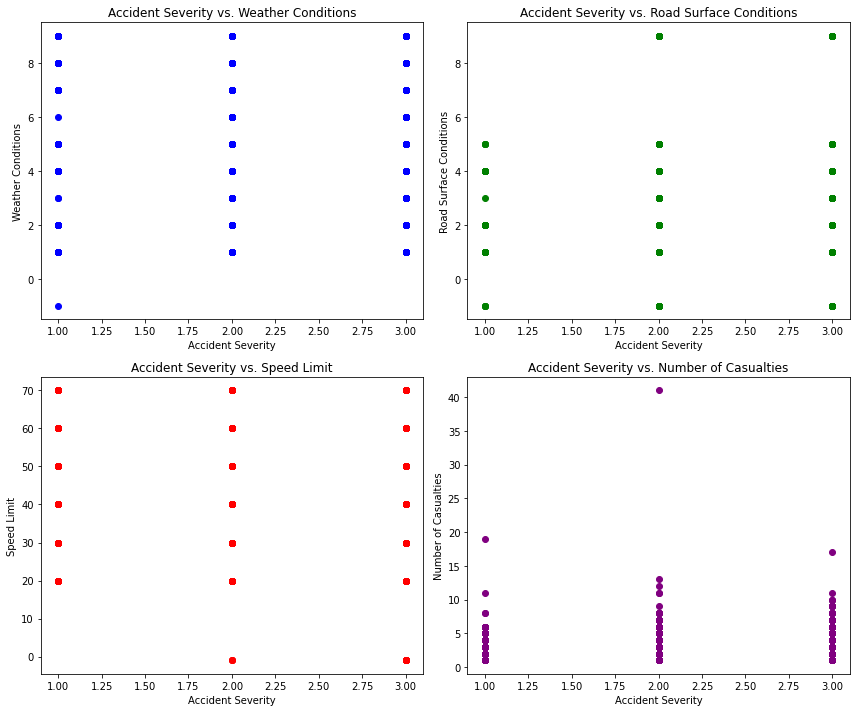

In [95]:


# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1 - accident_severity vs. weather_conditions
axes[0, 0].scatter(accident_df['accident_severity'], accident_df['weather_conditions'], color='blue')
axes[0, 0].set_xlabel('Accident Severity')
axes[0, 0].set_ylabel('Weather Conditions')
axes[0, 0].set_title('Accident Severity vs. Weather Conditions')

# Plot 2 - accident_severity vs. road_surface_conditions
axes[0, 1].scatter(accident_df['accident_severity'], accident_df['road_surface_conditions'], color='green')
axes[0, 1].set_xlabel('Accident Severity')
axes[0, 1].set_ylabel('Road Surface Conditions')
axes[0, 1].set_title('Accident Severity vs. Road Surface Conditions')

# Plot 3 - accident_severity vs. speed_limit
axes[1, 0].scatter(accident_df['accident_severity'], accident_df['speed_limit'], color='red')
axes[1, 0].set_xlabel('Accident Severity')
axes[1, 0].set_ylabel('Speed Limit')
axes[1, 0].set_title('Accident Severity vs. Speed Limit')

# Plot 4 - accident_severity vs. number_of_casualties
axes[1, 1].scatter(accident_df['accident_severity'], accident_df['number_of_casualties'], color='purple')
axes[1, 1].set_xlabel('Accident Severity')
axes[1, 1].set_ylabel('Number of Casualties')
axes[1, 1].set_title('Accident Severity vs. Number of Casualties')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


# PCA and Clustering Week 5

In [84]:
#kmeans = KMeans(n_clusters= 25)
#kmeans = KMeans(n_clusters= 30)
#kmeans = KMeans(n_clusters= 5)
kmeans = KMeans(n_clusters= 25)

In [85]:
df = accident_df[['longitude', 'latitude']]

In [86]:
kmeans.fit(df)

/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=25)

In [87]:
longitude  = accident_df['longitude']

In [88]:
longitude = np.array(longitude)

In [89]:
type(longitude)

numpy.ndarray

In [90]:
latitude =  accident_df['latitude']


In [91]:
latitude = np.array(latitude)

In [92]:
type(latitude)

numpy.ndarray

In [93]:
labels = kmeans.predict(df)
centroids= kmeans.cluster_centers_

In [94]:
labels

array([ 1,  1,  1, ..., 24,  2,  2], dtype=int32)

In [95]:
centroids

array([[-1.21477396e+00,  5.28949157e+01],
       [-1.30144280e-01,  5.15238953e+01],
       [-4.37413886e+00,  5.58906170e+01],
       [-2.34517393e+00,  5.14353200e+01],
       [-3.38353928e+00,  5.29595624e+01],
       [-3.10764165e+00,  5.46022349e+01],
       [-3.83399650e+00,  5.06107282e+01],
       [ 1.17224000e+00,  5.23219982e+01],
       [-1.48714715e+00,  5.36755354e+01],
       [-1.91389483e+00,  5.24707766e+01],
       [-1.52718500e+00,  5.48399729e+01],
       [-3.14236946e+00,  5.14803408e+01],
       [-1.42133074e+00,  5.09225732e+01],
       [ 4.24345463e-01,  5.13699514e+01],
       [-4.47527440e-01,  5.11461576e+01],
       [-3.22872509e+00,  5.60314321e+01],
       [-4.02407115e-01,  5.36321259e+01],
       [ 1.12562552e+00,  5.12390734e+01],
       [-5.03625988e+00,  5.03133800e+01],
       [ 1.27236581e-02,  5.25188341e+01],
       [-2.27723650e+00,  5.34610111e+01],
       [-4.21748996e+00,  5.18004680e+01],
       [-2.85234722e+00,  5.35504228e+01],
       [-8.

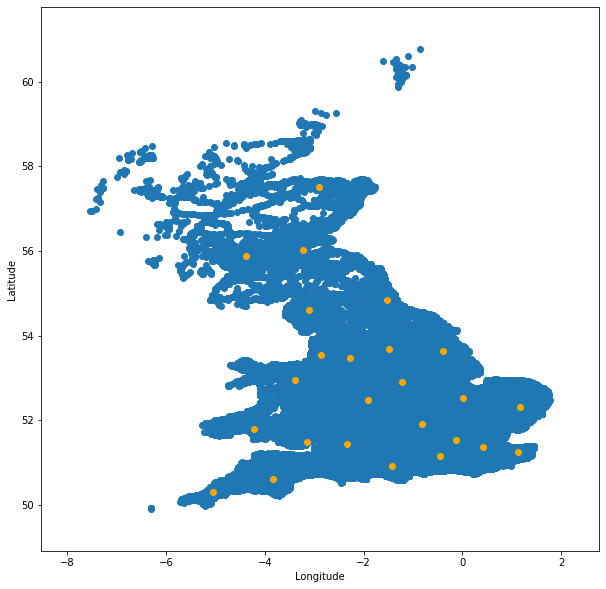

In [96]:
x = np.array(accident_df['longitude'])
y = np.array(accident_df['latitude'])
fig = plt.figure( figsize = (10,10))
plt.scatter(x, y)
plt.xlim(np.min(x) - 1, np.max(x) + 1)
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for x, y in centroids:
    plt.scatter(x, y, color='orange')
plt.show()

/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-pa

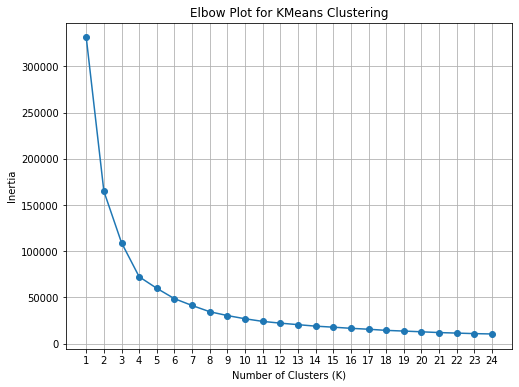

In [109]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Try different values of K (number of clusters)
k_values = range(1, 25)  # You can adjust this range as needed

# Calculate the inertia for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [110]:
inertia25 = kmeans.inertia_

In [111]:
inertia25

10387.68094081018

In [112]:
inertia30 = kmeans.inertia_

In [113]:
inertia30

10387.68094081018

In [114]:
inertia7 = kmeans.inertia_
inertia7

10387.68094081018

# Clustering Week 6


## Using KMedoids

The df dataframe is to big so in order to use Kmedoids we have to downsize the dataframe to a value of about 20k. 

In [ ]:
from numpy.random import default_rng

rng = default_rng()
idx = rng.choice(df.shape[0], size=20000, replace = False)
df_small = df.iloc[idx]


In [ ]:
kMedoids = KMedoids(n_clusters=25, random_state =  0)
kMedoids.fit(df_small)

In [ ]:
labels = kMedoids.fit(df_small).predict(df_small)
silhouette_score(df_small, labels, metric='euclidean')

In [103]:
s_score = silhouette_score(df_small, labels, metric='euclidean')

In [104]:
print(s_score)

-0.16782492701124987


## Using DBSCAN 

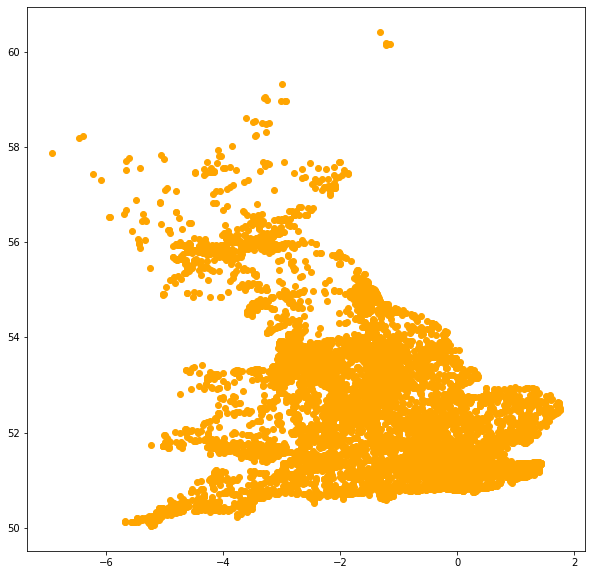

In [105]:

plt.figure(figsize=(10,10))
plt.scatter(df_small['longitude'], df_small['latitude'], color = 'orange')

In [106]:
dbscan_opt = DBSCAN(eps=0.25, min_samples= 150 )
dbscan_opt.fit(df_small)
labels = dbscan_opt.labels_
labels

array([ 0,  0, -1, ...,  0,  0,  0])

In [107]:
rand_score = rand_score(labels, labels_pred)

NameError: name 'labels_pred' is not defined

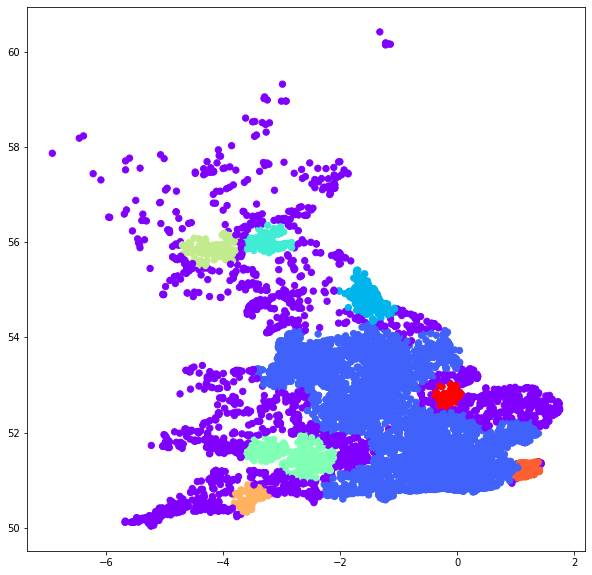

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(df_small['longitude'], df_small['latitude'], c=labels, s=40, cmap='rainbow')
plt.show()

## Looking for Temporal Trends

In [109]:
accident_df['converted_time'] = pd.DatetimeIndex(accident_df['time'])
accident_df['converted_time']

0        2023-08-13 03:12:00
1        2023-08-13 01:30:00
2        2023-08-13 00:30:00
3        2023-08-13 01:11:00
4        2023-08-13 01:42:00
                 ...        
461347   2023-08-13 14:30:00
461348   2023-08-13 15:05:00
461349   2023-08-13 12:42:00
461350   2023-08-13 14:00:00
461351   2023-08-13 13:50:00
Name: converted_time, Length: 461226, dtype: datetime64[ns]

In [110]:
#accident_df['decimal_time'] = time.hour + time.minute/60.

accident_df['decimal_time'] =  (
    accident_df["converted_time"].dt.hour + accident_df["converted_time"].dt.minute / 60 + accident_df["converted_time"].dt.second / 3600
)

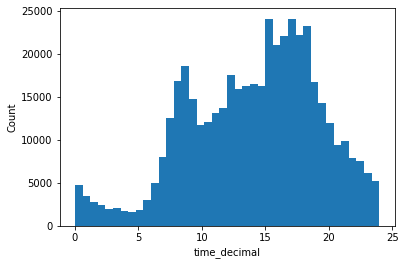

In [111]:
plt.hist(accident_df['decimal_time'], bins=40)
plt.xlabel('time_decimal')
plt.ylabel('Count')
plt.show()

In [ ]:
time_new

In [112]:
accident_df['day_of_week']

0         7
1         1
2         1
3         1
4         1
         ..
461347    4
461348    6
461349    4
461350    3
461351    3
Name: day_of_week, Length: 461226, dtype: int64

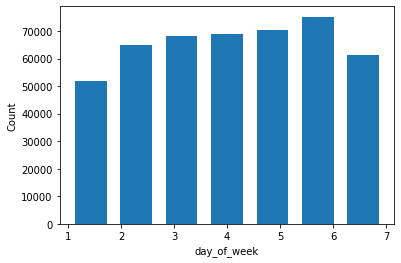

In [113]:
plt.hist(accident_df['day_of_week'],bins=7, rwidth=0.7)
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.show()

In [ ]:
#Day of year
plt.hist(accident_df['day_of_week'],bins=7, rwidth=0.7)
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.show()

# Outlier Detection and Handling -Week 7

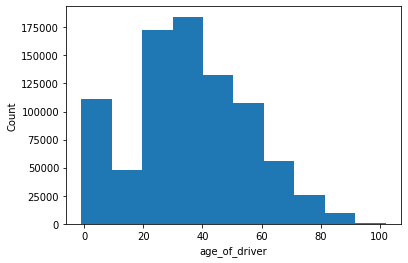

In [117]:
plt.hist(vehicle_df['age_of_driver'])
plt.xlabel('age_of_driver')
plt.ylabel('Count')
plt.show()

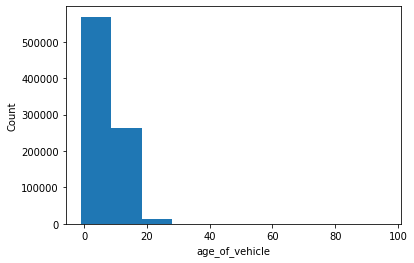

In [116]:
plt.hist(vehicle_df['age_of_vehicle'])
plt.xlabel('age_of_vehicle')
plt.ylabel('Count')
plt.show()

### Multiple of Interquartile Range (IQR) Method 

In [118]:
def get_multiple_of_iqr(df):
    q75 = df.quantile(q=0.75)
    q25 = df.quantile(q=0.25)
    iqr = q75-q25
    print(q25-1.5*iqr, q75+1.5*iqr)
    

In [119]:
get_multiple_of_iqr(vehicle_df['age_of_driver'])

-17.5 90.5


In [120]:
get_multiple_of_iqr(vehicle_df['age_of_vehicle'])

-15.0 25.0


In [121]:
vehicle_df['age_of_driver'].unique()

array([ 24,  19,  33,  40,  -1,  35,  31,  37,  29,  78,  14,  58,  27,
        39,  26,  47,  59,  44,  74,  56,  48,  41,  65,  21,  25,  32,
        34,  72,  20,  45,  50,  49,  63,  23,  30,  17,  55,  69,  28,
        16,  54,  22,  46,  43,  61,  76,  18,  60,  53,  62,  52,  57,
        36,  70,  42,  64,  77,  66,  51,  38,  81,  83,  73,  95,  75,
        86,  79,  80,  67,  68,  85,  88,  82,  84,  71,  87,  90,  15,
        12,  13,   9,  92,  11,  89,  10,  96,   6,   8,  91,   7,  94,
        93,   3,   5,  98,   4,  97,  99,   2, 100,   1, 101, 102])

In [122]:
vehicle_df['age_of_vehicle'].unique()

array([ 1, -1,  8, 12,  9, 14,  6, 13,  5, 11, 10,  7,  4, 15, 16,  2, 18,
        3, 17, 20, 19, 21, 23, 22, 26, 27,  0, 31, 28, 49, 29, 24, 32, 25,
       52, 45, 40, 38, 30, 62, 43, 34, 33, 37, 36, 35, 50, 58, 61, 39, 51,
       42, 41, 55, 57, 54, 48, 64, 53, 59, 56, 70, 60, 65, 69, 47, 85, 46,
       75, 74, 78, 44, 66, 67, 68, 77, 81, 63, 83, 84, 87, 94, 90, 88, 72,
       71, 80, 86, 92, 96, 93])

### Grubbs' Test 

In [123]:
def grubbs(df):
    avg = df.mean()
    absvalues = abs(df - avg)
    maxvalue = max(absvalues)
    stdev = df.std()
    Grubbs = maxvalue/stdev
    print(df.argmax(),Grubbs)
    

In [124]:
grubbs(vehicle_df['age_of_driver'])

604642 3.222995735183598


In [125]:
vehicle_df.loc[67465]

vehicle_index                               67465
accident_index                      2017077035859
accident_year                                2017
accident_reference                      077035859
vehicle_reference                               2
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            8
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        0
hit_object_in_carriageway                      10
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      0
first_point_of_impact                           3
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


In [126]:
def get_critical_G(size, alpha):
    tdist = stats.t.ppf(1-alpha/(2*size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    
    critical_value = numerator/denominator
    
    print('Grubbs Critical Value : {}' .format(critical_value))
    return critical_value

In [127]:
Gcritical = get_critical_G(len(vehicle_df['age_of_driver']), 0.05)

Grubbs Critical Value : 5.422104454487083


In [128]:
grubbs(vehicle_df['age_of_vehicle'])

825333 14.74425566812392


In [129]:
get_critical_G(len(vehicle_df['age_of_vehicle']), 0.05)

Grubbs Critical Value : 5.422104454487083


5.422104454487083

In [130]:
vehicle_df.loc[143617]

vehicle_index                              143617
accident_index                      2017370153218
accident_year                                2017
accident_reference                      370153218
vehicle_reference                               1
vehicle_type                                    9
towing_and_articulation                         0
vehicle_manoeuvre                              18
vehicle_direction_from                          5
vehicle_direction_to                            1
vehicle_location_restricted_lane                0
junction_location                               0
skidding_and_overturning                        5
hit_object_in_carriageway                       0
vehicle_leaving_carriageway                     1
hit_object_off_carriageway                      3
first_point_of_impact                           1
vehicle_left_hand_drive                         1
journey_purpose_of_driver                       6
sex_of_driver                                   2


# OUTLIERS 2- WEEK 8

## Local Outlier Factor Method 

In [131]:
lof_model = LocalOutlierFactor(contamination = 'auto' )

In [132]:
coord_outliers = lof_model.fit_predict(df)

In [133]:
coord_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [134]:
len(coord_outliers)

461226

/home/demi/.local/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


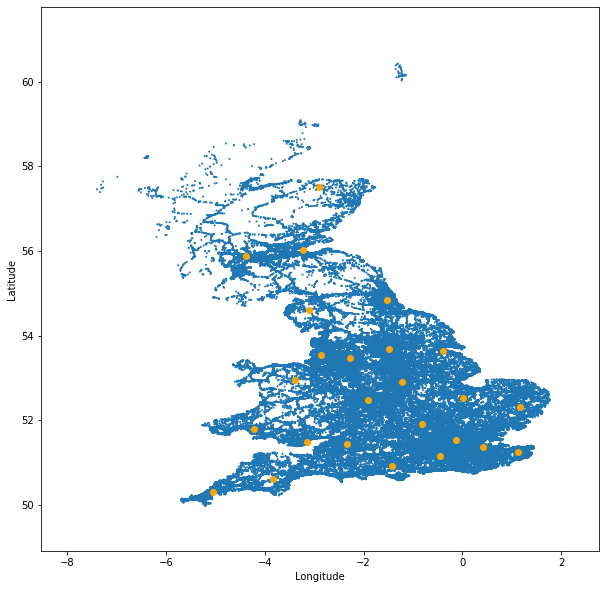

In [135]:
x = np.array(accident_df['longitude'])
y = np.array(accident_df['latitude'])
fig = plt.figure( figsize = (10,10))
plt.scatter(x, y, coord_outliers)
plt.xlim(np.min(x) - 1, np.max(x) + 1)
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for x, y in centroids:
    plt.scatter(x, y, color='orange')
plt.show()

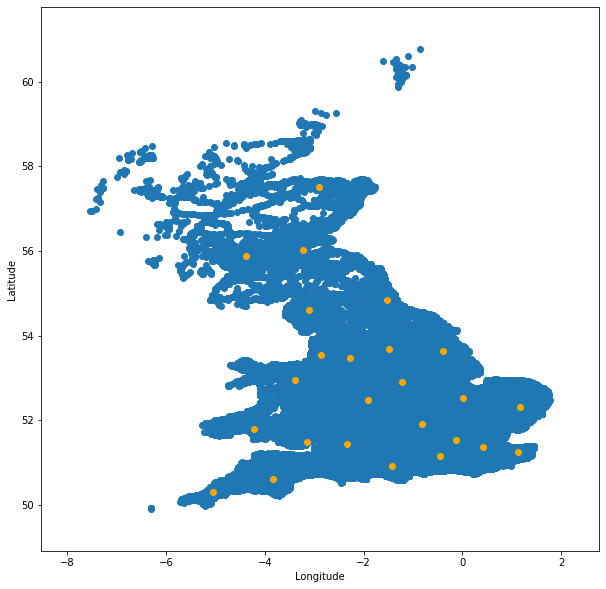

In [136]:
x = np.array(accident_df['longitude'])
y = np.array(accident_df['latitude'])
fig = plt.figure( figsize = (10,10))
plt.scatter(x, y)
plt.xlim(np.min(x) - 1, np.max(x) + 1)
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for x, y in centroids:
    plt.scatter(x, y, color='orange')
plt.show()

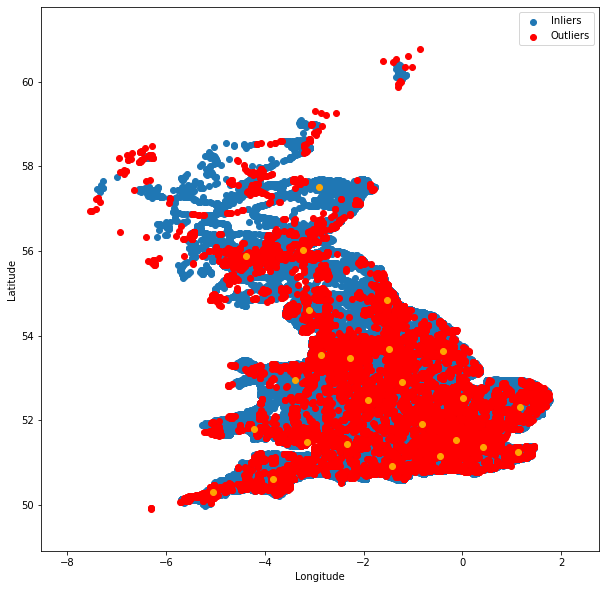

In [139]:
coord_scores = lof_model.fit_predict(df)
x = np.array(accident_df['longitude'])
y = np.array(accident_df['latitude'])

# Separate inliers and outliers
inliers_x = x[coord_scores > 0]  # Inliers have positive LOF scores
inliers_y = y[coord_scores > 0]
outliers_x = x[coord_scores < 0]  # Outliers have negative LOF scores
outliers_y = y[coord_scores < 0]

fig = plt.figure(figsize=(10, 10))

# Plot inliers (default color)
plt.scatter(inliers_x, inliers_y, label='Inliers')

# Plot outliers with a different color
plt.scatter(outliers_x, outliers_y, color='red', label='Outliers')

plt.xlim(np.min(x) - 1, np.max(x) + 1)
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for x, y in centroids:
    plt.scatter(x, y, color='orange')

plt.legend()  # Add legend to show which points are inliers and outliers
plt.show()

## Isolation Forest 

In [285]:
accident_df.dtypes

accident_index                                         object
accident_year                                           int64
accident_reference                                     object
location_easting_osgr                                 float64
location_northing_osgr                                float64
longitude                                             float64
latitude                                              float64
police_force                                            int64
accident_severity                                       int64
number_of_vehicles                                      int64
number_of_casualties                                    int64
date                                                   object
day_of_week                                             int64
time                                                   object
local_authority_district                                int64
local_authority_ons_district                           object
local_au

In [286]:
num_accident_df = accident_df.drop(['accident_index', 'accident_reference','date', 'time', 'local_authority_ons_district', 'local_authority_highway','lsoa_of_accident_location', 'converted_time'], axis = 1)

In [287]:
iforest = IsolationForest(contamination = 0.01)

In [288]:
iforest.fit(num_accident_df)

/home/demi/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [289]:
if_outliers = iforest.predict(num_accident_df)

In [290]:
if_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [291]:
out = np.where(if_outliers == -1)

print(len(out[0]))

912


When contamination = 0.01, we have 912 outliers
When contamination = 0.1, we have 9119 outliers
When contamination = 0.05, we have 4560 outliers

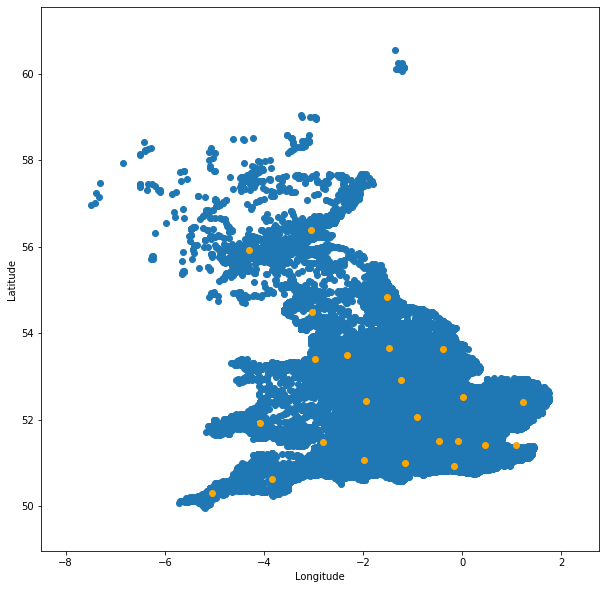

In [292]:
x = np.array(accident_df['longitude'])
y = np.array(accident_df['latitude'])
fig = plt.figure( figsize = (10,10))
plt.scatter(x, y)
plt.xlim(np.min(x) - 1, np.max(x) + 1)
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for x, y in centroids:
    plt.scatter(x, y, color='orange')
plt.show()

/home/demi/.local/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


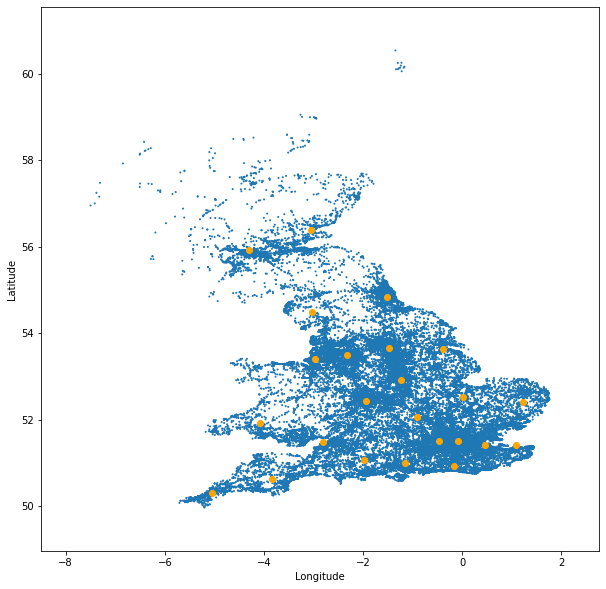

In [293]:
x = np.array(accident_df['longitude'])
y = np.array(accident_df['latitude'])
fig = plt.figure( figsize = (10,10))
plt.scatter(x, y,if_outliers )
plt.xlim(np.min(x) - 1, np.max(x) + 1)
plt.ylim(np.min(y) - 1, np.max(y) + 1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for x, y in centroids:
    plt.scatter(x, y, color='orange')
plt.show()

## Correlation Analysis

/tmp/ipykernel_40707/301613420.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  accident_correlation_matrix = accident_df.corr()


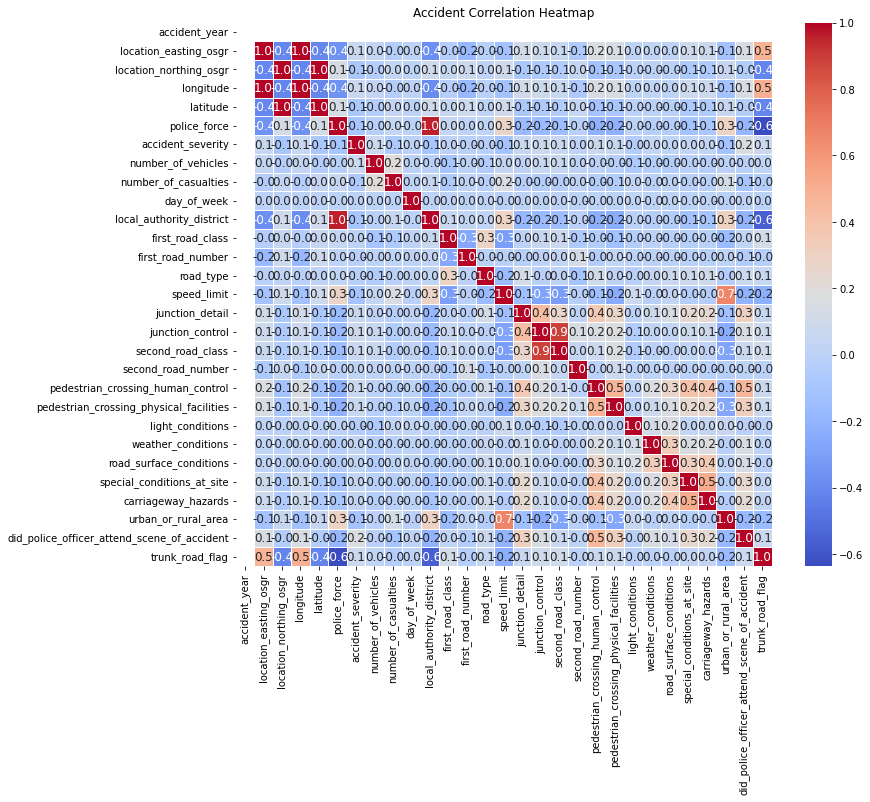

In [93]:
# Compute the correlation matrix
accident_correlation_matrix = accident_df.corr()

# Calculate the size of the figure based on the number of columns in the DataFrame
fig_width = min(12, len(accident_df.columns) * 0.75)
fig_height = min(10, len(accident_df.columns) * 0.5)

# Create the correlation heatmap using seaborn
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(accident_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, fmt=".1f")
plt.title("Accident Correlation Heatmap")
plt.show()

/tmp/ipykernel_40707/1405558222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  vehicle_correlation_matrix = vehicle_df.corr()


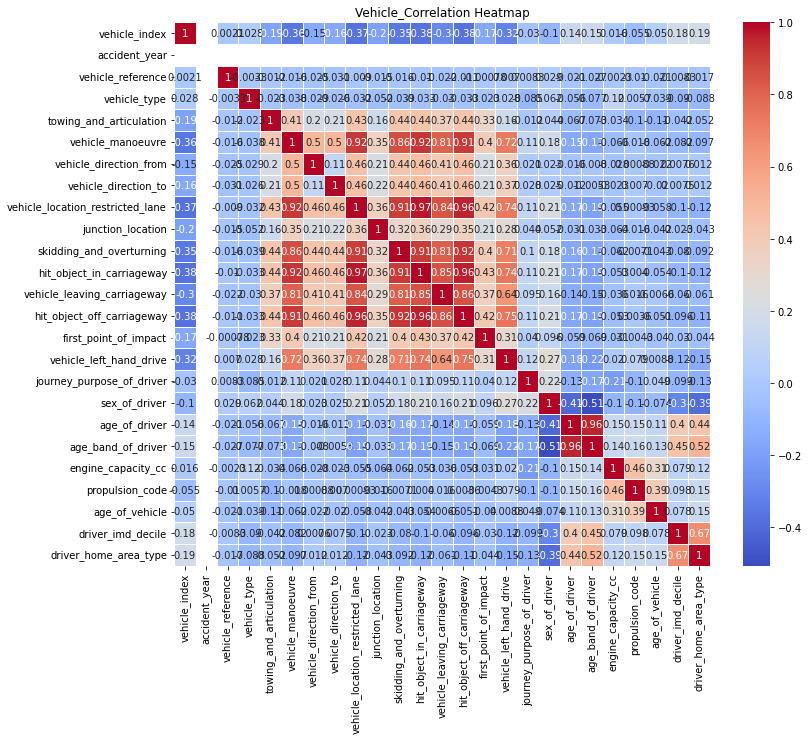

In [94]:
# Compute the correlation matrix
vehicle_correlation_matrix = vehicle_df.corr()

# Calculate the size of the figure based on the number of columns in the DataFrame
fig_width = min(12, len(vehicle_df.columns) * 0.75)
fig_height = min(10, len(vehicle_df.columns) * 0.5)

# Create the correlation heatmap using seaborn
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(vehicle_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Vehicle_Correlation Heatmap")
plt.show()

# Motor Bike Analysis

In [99]:
bike_query = """SELECT accident.*, vehicle.vehicle_type
FROM accident
INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
WHERE vehicle.vehicle_type IN (2, 3, 4, 5);
"""
motor_bike_data =  pd.read_sql(sql = bike_query, con = con)

In [100]:
motor_bike_data

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_type
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,1,1,0,0,1,1,2,E01001450,2
1,2017010009351,2017,010009351,514510.0,172370.0,-0.353876,51.438762,1,3,2,...,4,1,2,0,0,1,1,2,E01003900,3
2,2017010009375,2017,010009375,524970.0,177640.0,-0.201598,51.483916,1,3,3,...,4,2,2,0,0,1,1,2,E01001881,3
3,2017010009386,2017,010009386,530080.0,178220.0,-0.127832,51.487977,1,3,2,...,4,2,2,0,0,2,1,2,E01004745,3
4,2017010009387,2017,010009387,538080.0,176330.0,-0.013419,51.469098,1,3,2,...,4,2,2,0,0,1,1,2,E01001638,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67296,2020991010130,2020,991010130,250655.0,658068.0,-4.383591,55.792760,99,3,2,...,4,1,1,0,0,1,2,-1,-1,3
67297,2020991011809,2020,991011809,268116.0,656638.0,-4.104624,55.785004,99,3,2,...,4,8,2,0,0,1,2,-1,-1,3
67298,2020991012311,2020,991012311,311646.0,683727.0,-3.419652,56.038240,99,2,2,...,4,1,1,0,0,1,1,-1,-1,3
67299,2020991012353,2020,991012353,318037.0,745230.0,-3.336269,56.591779,99,3,2,...,1,1,1,0,0,1,1,-1,-1,4


In [101]:
motor_bike_data['converted_time'] = pd.DatetimeIndex(motor_bike_data['time'])
motor_bike_data['converted_time']

0       2023-08-02 03:12:00
1       2023-08-02 03:31:00
2       2023-08-02 16:48:00
3       2023-08-02 19:10:00
4       2023-08-02 20:20:00
                ...        
67296   2023-08-02 16:30:00
67297   2023-08-02 17:30:00
67298   2023-08-02 17:55:00
67299   2023-08-02 15:45:00
67300   2023-08-02 12:42:00
Name: converted_time, Length: 67301, dtype: datetime64[ns]

In [102]:

motor_bike_data['decimal_time'] =  (
   motor_bike_data["converted_time"].dt.hour + motor_bike_data["converted_time"].dt.minute / 60 + motor_bike_data["converted_time"].dt.second / 3600
)

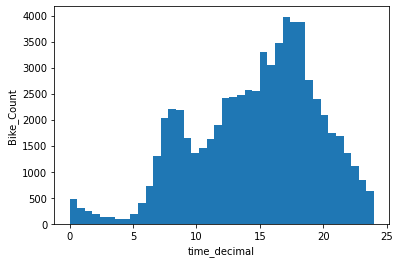

In [103]:
plt.hist(motor_bike_data['decimal_time'], bins=40)
plt.xlabel('time_decimal')
plt.ylabel('Bike_Count')
plt.show()

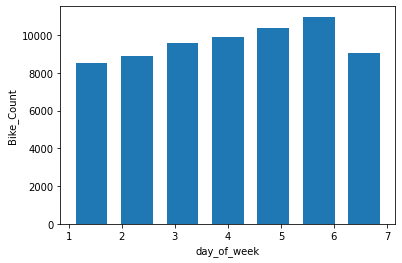

In [139]:
plt.hist(motor_bike_data['day_of_week'],bins=7, rwidth=0.7)
plt.xlabel('day_of_week')
plt.ylabel('Bike_Count')
plt.show()

## Pedestrians

In [144]:
casualty_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [114]:
# Create a new DataFrame with rows where casualty_class is equal to 3
pedestrian_query = """SELECT accident.*, casualty.casualty_type
FROM accident
INNER JOIN casualty ON accident.accident_index = casualty.accident_index
WHERE casualty.casualty_type = 3;
"""
pedestrian_data =  pd.read_sql(sql = pedestrian_query, con = con)

In [115]:
pedestrian_data

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,casualty_type
0,2017010009351,2017,010009351,514510.0,172370.0,-0.353876,51.438762,1,3,2,...,4,1,2,0,0,1,1,2,E01003900,3
1,2017010009386,2017,010009386,530080.0,178220.0,-0.127832,51.487977,1,3,2,...,4,2,2,0,0,2,1,2,E01004745,3
2,2017010009387,2017,010009387,538080.0,176330.0,-0.013419,51.469098,1,3,2,...,4,2,2,0,0,1,1,2,E01001638,3
3,2017010009388,2017,010009388,529960.0,168440.0,-0.133147,51.400113,1,3,2,...,4,2,2,0,0,1,1,2,E01003433,3
4,2017010009420,2017,010009420,526850.0,183130.0,-0.172563,51.532837,1,3,2,...,4,3,2,0,0,1,1,2,E01004726,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29616,2020991008618,2020,991008618,340683.0,674031.0,-2.951564,55.955619,99,2,2,...,6,1,1,0,0,2,1,-1,-1,3
29617,2020991009778,2020,991009778,276790.0,667071.0,-3.971138,55.880977,99,2,2,...,4,2,2,0,0,2,1,-1,-1,3
29618,2020991010130,2020,991010130,250655.0,658068.0,-4.383591,55.792760,99,3,2,...,4,1,1,0,0,1,2,-1,-1,3
29619,2020991011809,2020,991011809,268116.0,656638.0,-4.104624,55.785004,99,3,2,...,4,8,2,0,0,1,2,-1,-1,3


In [116]:
pedestrian_data['converted_time'] = pd.DatetimeIndex(pedestrian_data['time'])
pedestrian_data['converted_time']

0       2023-08-02 03:31:00
1       2023-08-02 19:10:00
2       2023-08-02 20:20:00
3       2023-08-02 19:35:00
4       2023-08-02 23:20:00
                ...        
29616   2023-08-02 07:20:00
29617   2023-08-02 20:50:00
29618   2023-08-02 16:30:00
29619   2023-08-02 17:30:00
29620   2023-08-02 17:55:00
Name: converted_time, Length: 29621, dtype: datetime64[ns]

In [117]:
pedestrian_data['decimal_time'] =  (
   pedestrian_data["converted_time"].dt.hour + pedestrian_data["converted_time"].dt.minute / 60 + pedestrian_data["converted_time"].dt.second / 3600
)

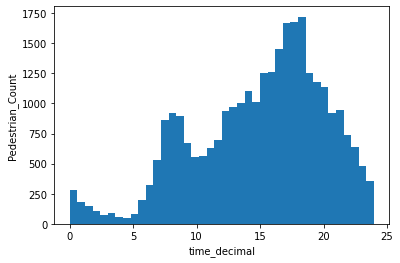

In [118]:
plt.hist(pedestrian_data['decimal_time'], bins=40)
plt.xlabel('time_decimal')
plt.ylabel('Pedestrian_Count')
plt.show()

In [121]:
pedestrian_data['decimal_time'].value_counts()

17.000000    307
17.500000    302
18.000000    274
18.500000    254
16.000000    249
            ... 
3.216667       1
0.516667       1
2.433333       1
3.966667       1
4.400000       1
Name: decimal_time, Length: 1359, dtype: int64

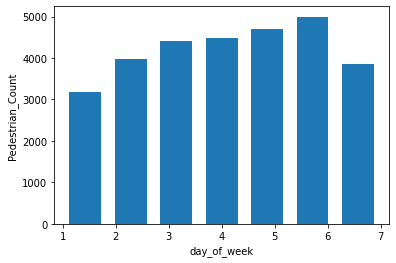

In [156]:
plt.hist(pedestrian_data['day_of_week'],bins=7, rwidth=0.7)
plt.xlabel('day_of_week')
plt.ylabel('Pedestrian_Count')
plt.show()

In [160]:
accident_df['weather_conditions']. unique()

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1])

# Regional Analysis 

In [187]:
query = """
SELECT vehicle.sex_of_driver AS driver_sex,
       casualty.sex_of_casualty AS casualty_sex,
       accident.speed_limit,
       accident.longitude,
       accident.latitude,
       vehicle.age_of_vehicle,
       lsoa.lsoa01nm,
       lsoa.lsoa01cd
FROM accident
JOIN vehicle ON accident.accident_index = vehicle.accident_index
JOIN casualty ON accident.accident_index = casualty.accident_index
JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
WHERE lsoa.lsoa01nm LIKE '%Kingston Upon Hull%'
   OR lsoa.lsoa01nm LIKE '%Humberside%'
   OR lsoa.lsoa01nm LIKE '%East Riding of Yorkshire%';


"""

# Fetch the results and store in a pandas DataFrame
Hull = pd.read_sql_query(query, con)
Hull

,driver_sex,casualty_sex,speed_limit,longitude,latitude,age_of_vehicle,lsoa01nm,lsoa01cd
0,1,1,30,-0.393435,53.745044,13,Kingston upon Hull 028C,E01012772
1,1,1,30,-0.393435,53.745044,9,Kingston upon Hull 028C,E01012772
2,1,1,60,-0.268489,53.862796,16,East Riding of Yorkshire 014D,E01013034
3,2,1,60,-0.268489,53.862796,2,East Riding of Yorkshire 014D,E01013034
4,1,1,60,-0.268489,53.862796,9,East Riding of Yorkshire 014D,E01013034
...,...,...,...,...,...,...,...,...
12962,3,1,30,-0.424674,53.839482,-1,East Riding of Yorkshire 019D,E01013041
12963,1,1,30,-0.424674,53.839482,-1,East Riding of Yorkshire 019D,E01013041
12964,1,1,30,-0.308880,53.782750,-1,Kingston upon Hull 007C,E01012907
12965,3,1,30,-0.342063,53.742609,-1,Kingston upon Hull 029C,E01012854


In [188]:

hull_coord = Hull[['longitude', 'latitude']]




In [198]:
kmeans.fit(hull_coord)

/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [199]:
hull_lat = Hull['latitude']
hull_lat = np.array(hull_lat)

In [200]:
hull_long = Hull['longitude']
hull_long = np.array(hull_long)


In [201]:
type(hull_long)

numpy.ndarray

In [202]:
hull_labels = kmeans.predict(hull_coord)
hull_centroids= kmeans.cluster_centers_

In [203]:
hull_labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [204]:
hull_centroids

array([[-0.30500992, 54.03537189],
       [-0.80116044, 53.79804769],
       [-0.35448572, 53.76662283]])

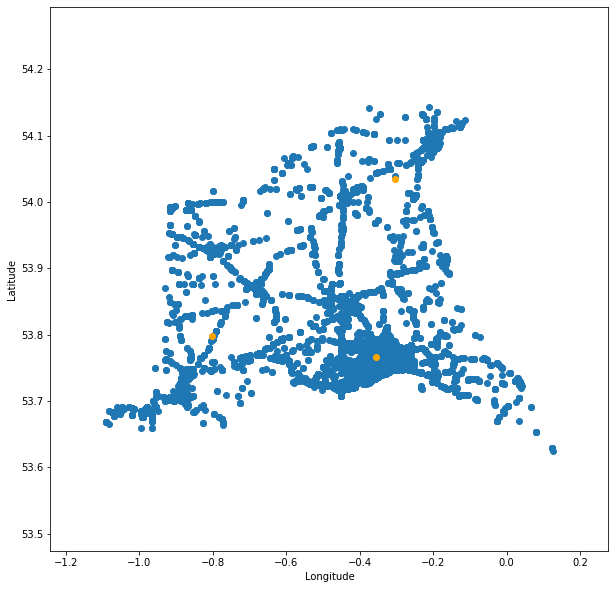

In [205]:
x = hull_long
y = hull_lat
fig = plt.figure( figsize = (10,10))
plt.scatter(x, y)
plt.xlim(np.min(x) - 0.15, np.max(x) + 0.15)
plt.ylim(np.min(y) - 0.15, np.max(y) + 0.15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for x, y in hull_centroids:
    plt.scatter(x, y, color='orange')
plt.show()

In [224]:
inertia5 = kmeans.inertia_

In [225]:
inertia5

1.678817614107448

In [235]:
inertia4 = kmeans.inertia_

In [236]:
inertia4

2.2028385866644813

/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/demi/.local/lib/python3.10/site-pa

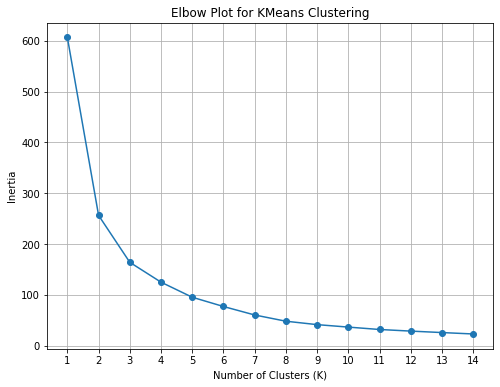

In [127]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Try different values of K (number of clusters)
k_values = range(1, 15)  # You can adjust this range as needed

# Calculate the inertia for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(hull_coord)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(k_values)
plt.grid(True)
plt.show()






In [110]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,converted_time,decimal_time
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,9,0,0,1,3,2,E01004576,2023-08-02 09:00:00,9.000000
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,1,0,0,1,1,2,E01003034,2023-08-02 13:55:00,13.916667
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,1,2,0,0,1,1,2,E01004726,2023-08-02 01:25:00,1.416667
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,1,0,0,1,1,2,E01003617,2023-08-02 01:50:00,1.833333
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,1,1,0,0,1,1,2,E01004763,2023-08-02 02:25:00,2.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,0,0,1,1,-1,-1,2023-08-02 14:30:00,14.500000
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,1,1,0,0,1,2,-1,-1,2023-08-02 15:05:00,15.083333
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,0,0,2,1,-1,-1,2023-08-02 12:42:00,12.700000
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,1,1,0,0,1,2,-1,-1,2023-08-02 14:00:00,14.000000


In [111]:
# Group the data by location and count the number of accidents
location_accidents = accident_df.groupby(['longitude', 'latitude']).size().reset_index(name='accident_count')

# Sort the results in descending order based on accident count
location_accidents_sorted = location_accidents.sort_values(by='accident_count', ascending=False)

# Retrieve the location with the most accidents (first row of the sorted data)
location_with_most_accidents = location_accidents_sorted.iloc[0]

# Print the result
print("Location with the most accidents:")
print(location_with_most_accidents)

Location with the most accidents:
longitude         -1.549110
latitude          53.799708
accident_count     4.000000
Name: 33107, dtype: float64


## Classification

In [175]:
fatality = {1: True, 2: False, 3: False}
accident_df['accident_severity'] = accident_df['accident_severity'].map(fatality)


In [174]:
accident_df['accident_severity'].unique()

array([1, 3, 2])

In [176]:
y_label = accident_df['accident_severity']

In [177]:
accident_df_drp = accident_df.drop('accident_severity', axis = 1)

In [178]:
y_label.value_counts()

False    454956
True       6396
Name: accident_severity, dtype: int64

In [179]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [180]:
from imblearn.under_sampling import RandomUnderSampler

In [181]:
#Create a balanced dataset using the RandomUnderSampler
accident_df_balanced, y_balanced = RandomUnderSampler().fit_resample(accident_df_drp, y_label)

In [182]:
y_balanced.value_counts()

False    6396
True     6396
Name: accident_severity, dtype: int64

## Feature Selection Using Filtering 

Remove did_police_officer_attend_scene_of_accident column. Police officers
are more likely to attend an accident if it is fatal, and we are interested in the causes
of fatal accidents not how the police respond after the event.

In [183]:
accident_df_drp = accident_df.drop(['did_police_officer_attend_scene_of_accident' ], axis = 1)

In [184]:
accident_df_drp.select_dtypes([np.number])

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,2017,532920.0,196330.0,-0.080107,51.650061,1,2,3,7,32,...,-1,0,0,4,1,1,0,0,1,2
1,2017,526790.0,181970.0,-0.173845,51.522425,1,2,1,1,1,...,0,0,0,4,1,2,0,0,1,2
2,2017,535200.0,181260.0,-0.052969,51.514096,1,3,1,1,5,...,0,0,0,4,1,1,0,0,1,2
3,2017,534340.0,193560.0,-0.060658,51.624832,1,2,1,1,32,...,154,0,4,4,2,2,0,0,1,2
4,2017,533680.0,187820.0,-0.072372,51.573408,1,1,1,1,4,...,10,0,5,4,1,2,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020,343034.0,731654.0,-2.926320,56.473539,99,2,1,4,918,...,959,0,0,1,1,1,0,0,1,-1
461348,2020,257963.0,658891.0,-4.267565,55.802353,99,1,1,6,922,...,0,0,0,1,1,1,0,0,1,-1
461349,2020,383664.0,810646.0,-2.271903,57.186317,99,2,1,4,910,...,0,0,0,1,1,1,0,0,2,-1
461350,2020,277161.0,674852.0,-3.968753,55.950940,99,2,1,3,932,...,0,0,0,1,1,1,0,0,1,-1


In [185]:
from sklearn.feature_selection import SelectKBest, f_classif

In [186]:
accident_df_balanced = accident_df_balanced.drop(['did_police_officer_attend_scene_of_accident' ], axis = 1)

In [193]:
n = accident_df_balanced.select_dtypes([np.number])

In [194]:
a= accident_df_drp.select_dtypes([np.number])

Generate the object we will use to select the best features for classifying and run it on the data frame. Get it to select the 10 best features to use for classification

In [196]:
n = n.dropna(axis=1)

In [197]:
selector= SelectKBest(f_classif, k=10)
selector.fit(n, y_balanced)

SelectKBest()

In [198]:
mask = selector.get_support()

In [199]:
names = selector.feature_names_in_[mask]

In [200]:
scores = selector.scores_[mask]

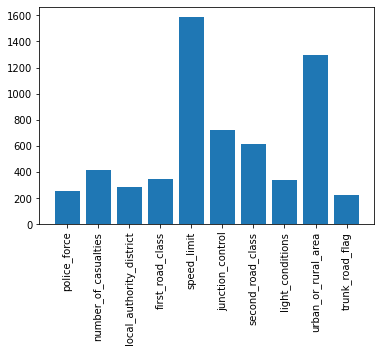

In [201]:
plt.bar(names, scores)
plt.xticks(rotation = 'vertical')
plt.show()

## Classification

In [202]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [203]:
X_train, X_test, y_train, y_test = train_test_split(n, y_balanced, test_size=0.25, random_state = 1)

In [204]:
tree1 = DecisionTreeClassifier(min_samples_leaf = 100)

In [205]:
results_tree = cross_validate(tree1, X_train, y_train, cv=10, scoring='accuracy', return_estimator=True)

In [206]:
tree2 = tree1.fit(X_train, y_train)

In [207]:
tree2

DecisionTreeClassifier(min_samples_leaf=100)

In [208]:
Y_pred = tree1.predict(X_test)

In [209]:
acc_tree = round(tree1.score(X_train, y_train)*100, 2)

<AxesSubplot: >

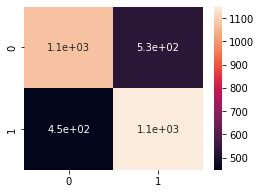

In [210]:
plt.figure(figsize = (4, 3))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True)

In [211]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.71      0.67      0.69      1601
        True       0.69      0.72      0.70      1597

    accuracy                           0.70      3198
   macro avg       0.70      0.70      0.70      3198
weighted avg       0.70      0.70      0.70      3198



In [212]:
df_importance = pd.DataFrame(np.array([tree1.feature_names_in_, 
                                      tree1.feature_importances_]
                                     ).T,
                             columns = ['Feature', 'Importance']
                             
                            )

In [213]:
df_importance.sort_values('Importance', ascending=False)

,Feature,Importance
9,speed_limit,0.466582
2,number_of_vehicles,0.208469
10,junction_detail,0.076166
5,local_authority_district,0.06687
16,light_conditions,0.050164
3,number_of_casualties,0.040256
7,first_road_number,0.033175
8,road_type,0.017582
6,first_road_class,0.015331
17,weather_conditions,0.006043


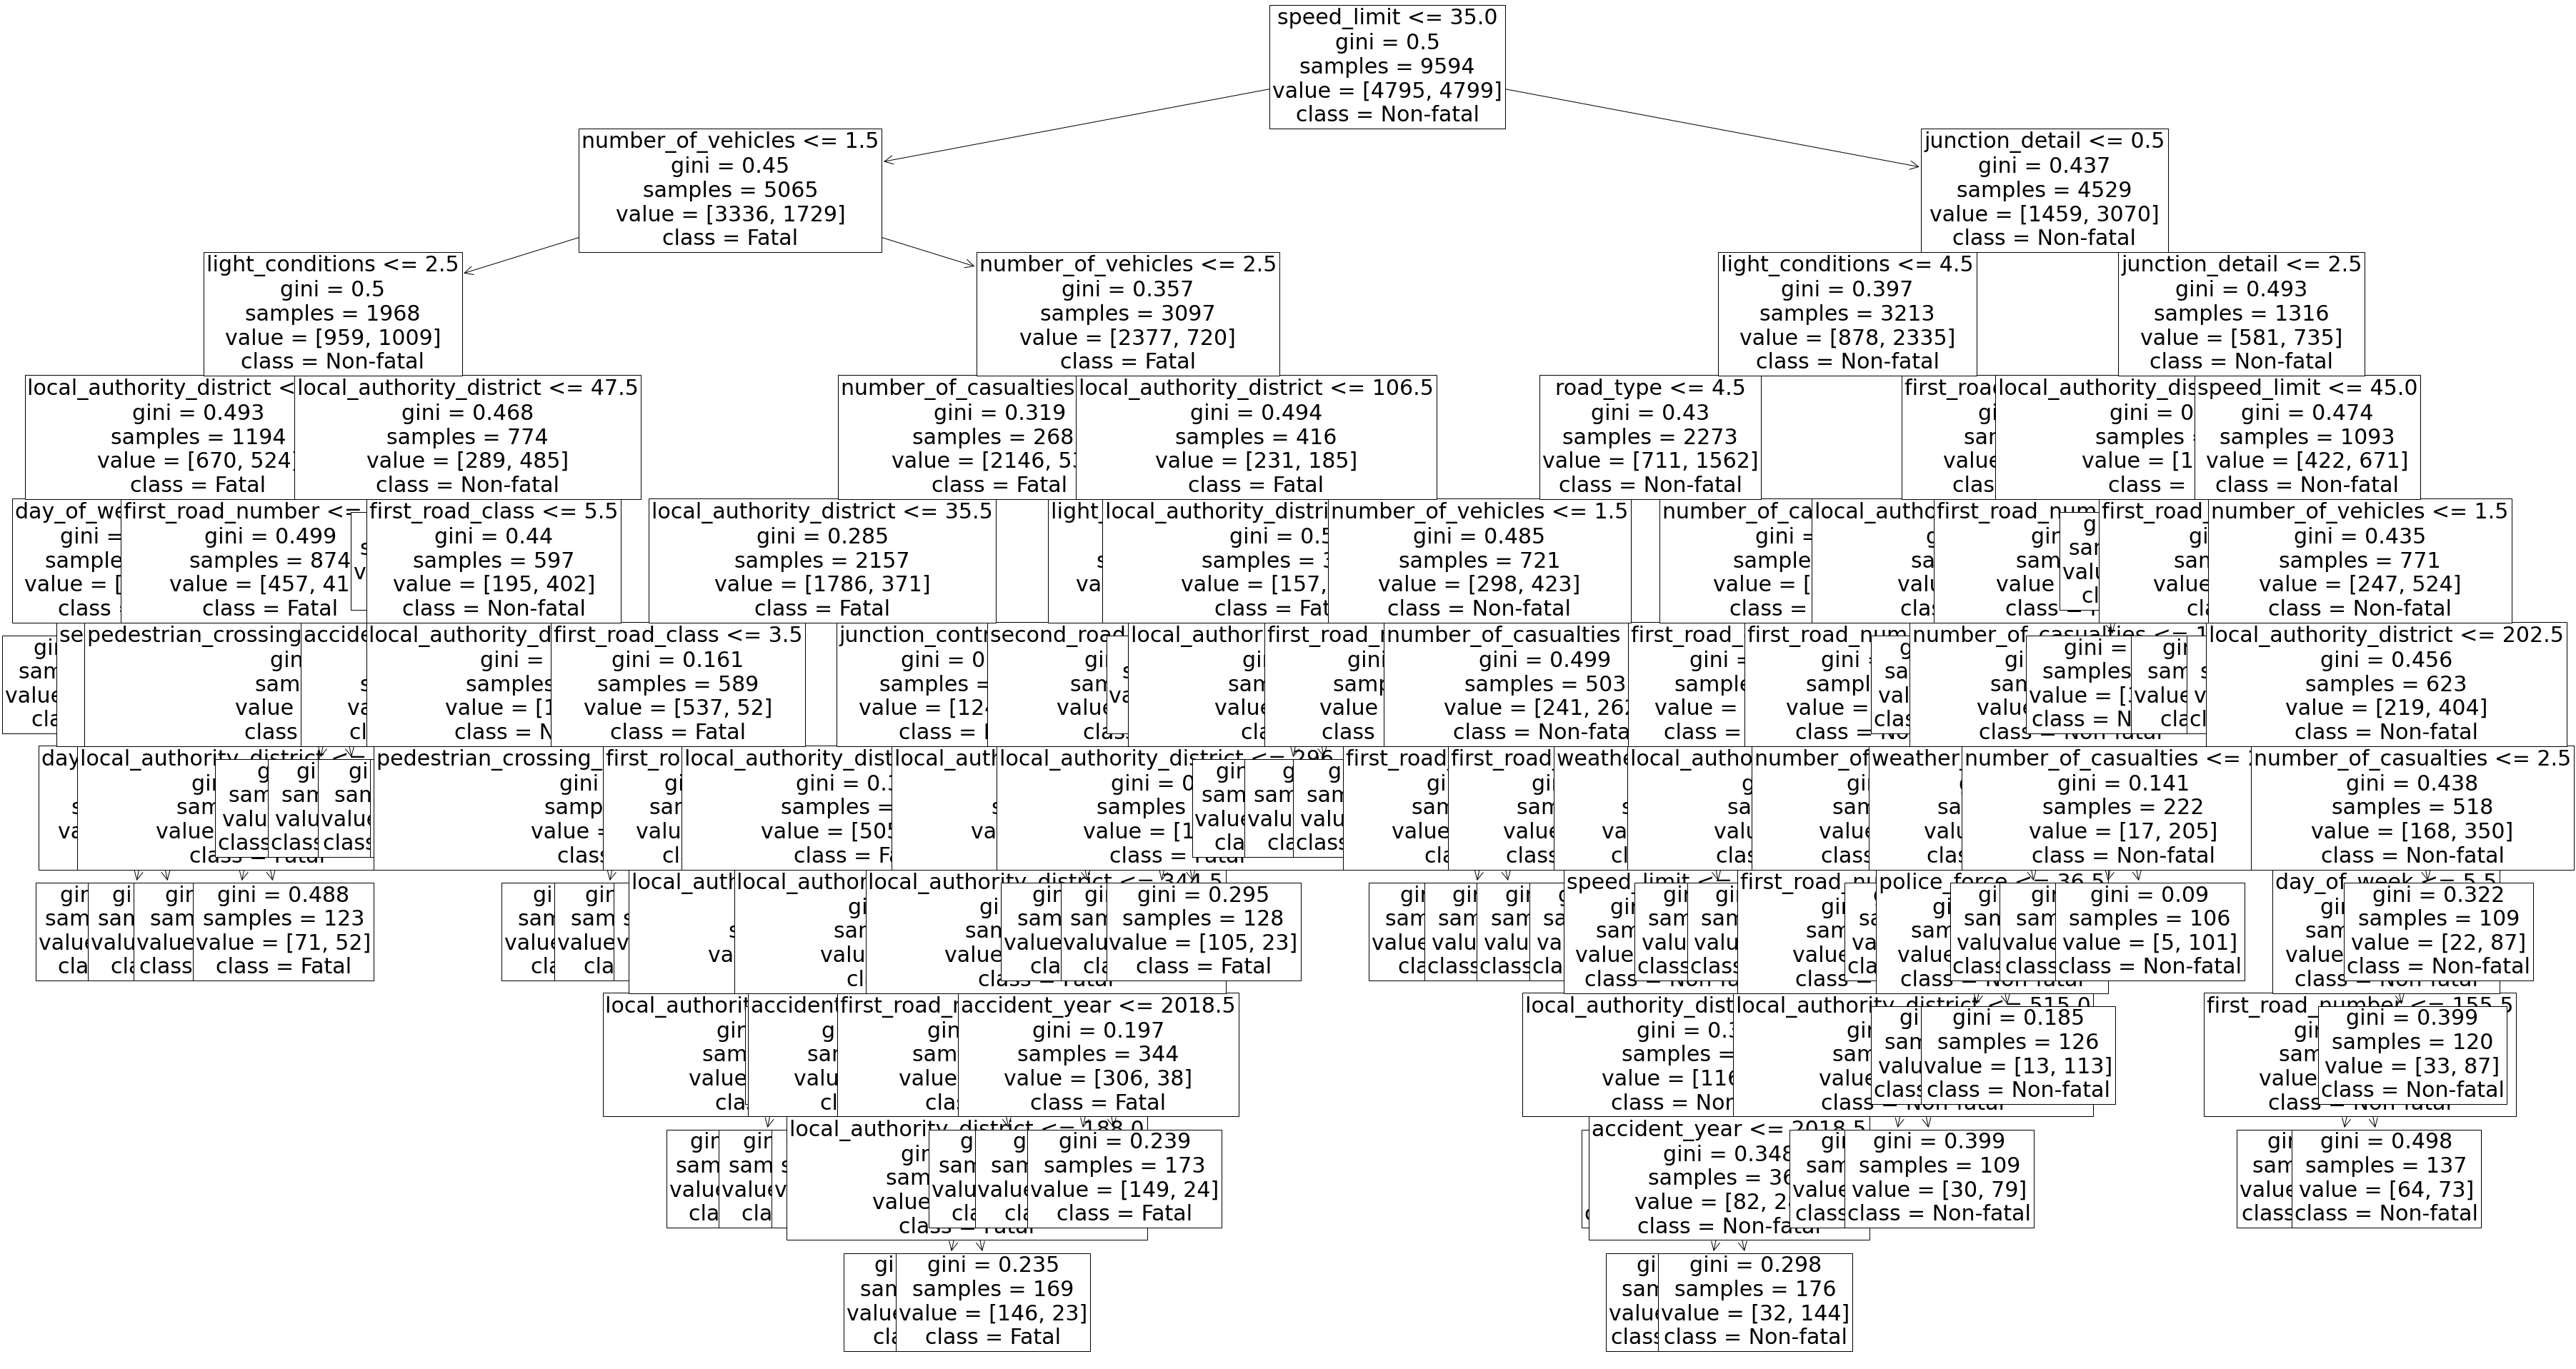

In [214]:
plt.figure(figsize=(60,35))
tree.plot_tree(tree2, feature_names = tree1.feature_names_in_,
         class_names=['Fatal', 'Non-fatal'], fontsize = 30)
plt.show()

In [215]:
max_depth_range = list(range(1,20))
accuracy = []
for depth in max_depth_range:
    decision_tree = DecisionTreeClassifier(max_depth=depth, 
                                          random_state = 0)
    decision_tree.fit(X_train, y_train)
    score = decision_tree.score(X_test, y_test)
    accuracy.append(score)
    

In [216]:
accuracy

[0.651031894934334,
 0.6691682301438399,
 0.6860537836147592,
 0.6879299562226392,
 0.6929330831769857,
 0.706066291432145,
 0.6954346466541589,
 0.6944965603502189,
 0.6929330831769857,
 0.6929330831769857,
 0.6807379612257661,
 0.6763602251407129,
 0.66541588492808,
 0.6560350218886805,
 0.6497811131957474,
 0.6344590368980613,
 0.6388367729831145,
 0.6332082551594747,
 0.6307066916823014]